In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [62]:
df = pd.read_csv('titanic.csv')

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Standardizing Column Names

In [66]:
df = df.rename(columns={'PassengerId':'passengerid', 'Survived':'survived', 'Pclass':'pclass','Sex':'sex','Age':'age',
                        'SibSp':'sibsp','Parch':'parch','Fare':'fare','Cabin':'cabin','Embarked':'embarked'})

In [67]:
df.head(2)

,passengerid,survived,pclass,Name,sex,age,sibsp,parch,Ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Univariate Analysis

Survived column

In [68]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

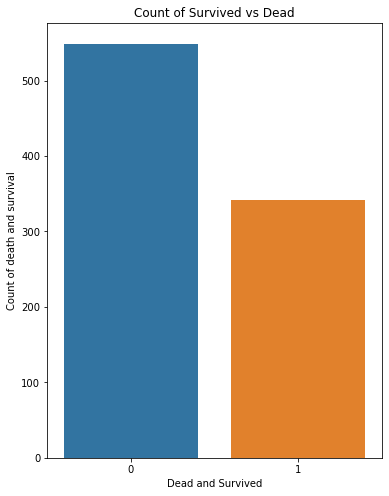

In [69]:
plt.figure(figsize = (6,8))
sns.countplot(x=df['survived'])
plt.title('Count of Survived vs Dead')
plt.xlabel('Dead and Survived')
plt.ylabel('Count of death and survival')
plt.show()

Passenger Class

In [70]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

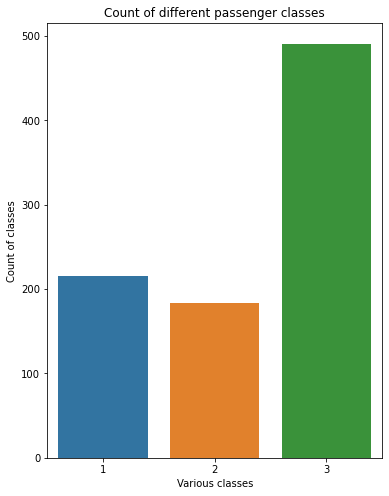

In [71]:
plt.figure(figsize = (6,8))
sns.countplot(x=df['pclass'])
plt.title('Count of different passenger classes')
plt.xlabel('Various classes')
plt.ylabel('Count of classes')
plt.show()

Age Column

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


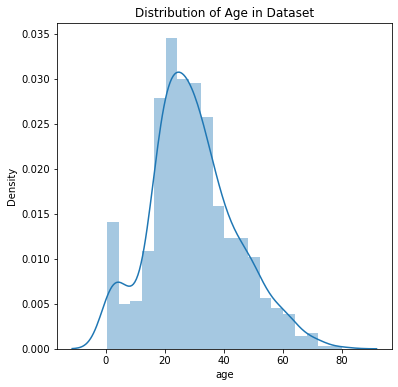

In [72]:
plt.figure(figsize = (6,6))
plt.title('Distribution of Age in Dataset')
sns.distplot(df['age'])
plt.show()

SibSp column

In [73]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


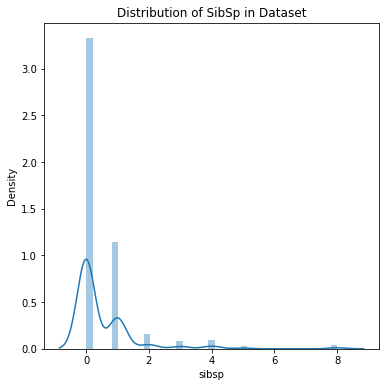

In [74]:
plt.figure(figsize = (6,6))
plt.title('Distribution of SibSp in Dataset')
sns.distplot(df['sibsp'])
plt.show()

Parch column

In [75]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


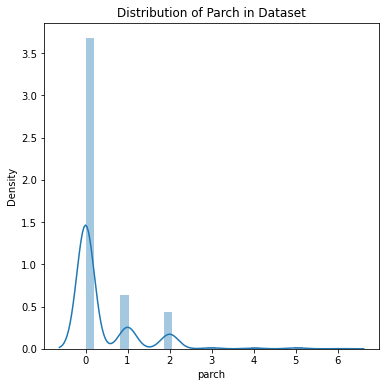

In [76]:
plt.figure(figsize = (6,6))
plt.title('Distribution of Parch in Dataset')
sns.distplot(df['parch'])
plt.show()

Fare Column

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


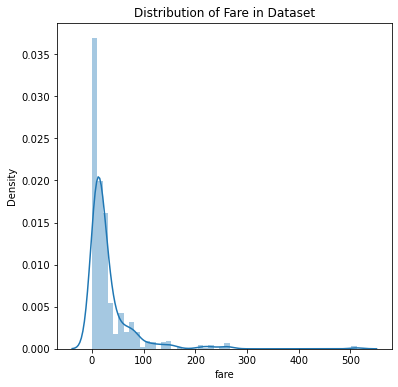

In [77]:
plt.figure(figsize = (6,6))
plt.title('Distribution of Fare in Dataset')
sns.distplot(df['fare'])
plt.show()

Embarked Column

In [78]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

C:\Users\bhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


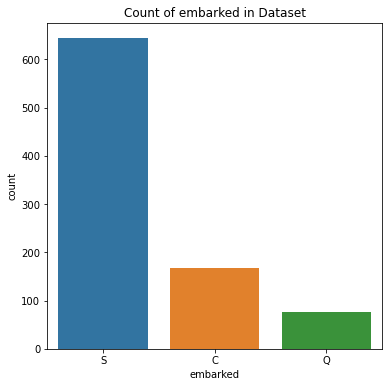

In [79]:
plt.figure(figsize = (6,6))
plt.title('Count of embarked in Dataset')
sns.countplot(df['embarked'])
plt.show()

## Dropping insignificant columns

In [80]:
df.drop(columns = ['passengerid','Name','Ticket','cabin'],inplace=True)

In [81]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


## BiVariate Analysis vs Survived column

Passenger Class against Survived

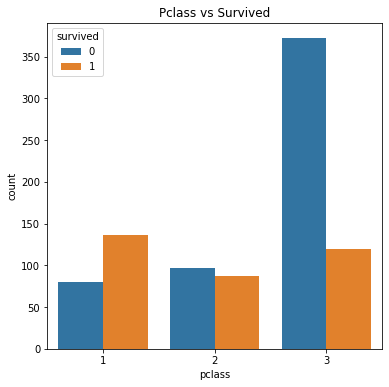

In [82]:
plt.figure(figsize = (6,6))
plt.title('Pclass vs Survived')
sns.countplot(x=df['pclass'],hue=df['survived'])
plt.show()

Sex vs Survived

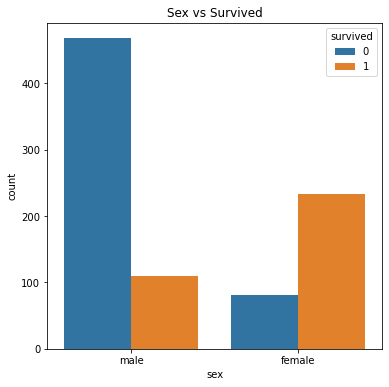

In [83]:
plt.figure(figsize = (6,6))
plt.title('Sex vs Survived')
sns.countplot(x=df['sex'],hue=df['survived'])
plt.show()

Age vs Survived

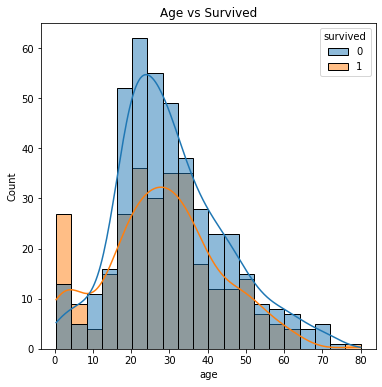

In [84]:
plt.figure(figsize = (6,6))
plt.title('Age vs Survived')
sns.histplot(x=df['age'],hue=df['survived'],kde=True)
plt.show()

SibSip vs Fare

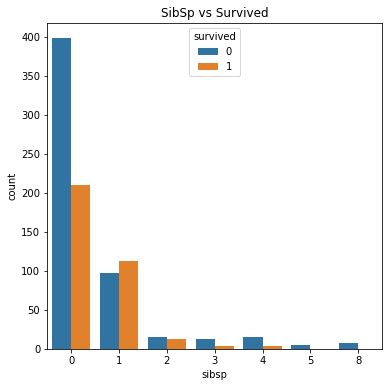

In [85]:
plt.figure(figsize = (6,6))
plt.title('SibSp vs Survived')
sns.countplot(x=df['sibsp'],hue=df['survived'])
plt.show()

Parch vs Survived

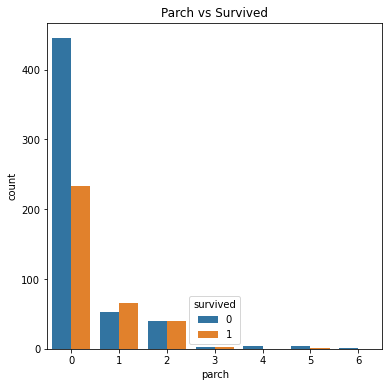

In [86]:
plt.figure(figsize = (6,6))
plt.title('Parch vs Survived')
sns.countplot(x=df['parch'],hue=df['survived'])
plt.show()

Fare vs Survived

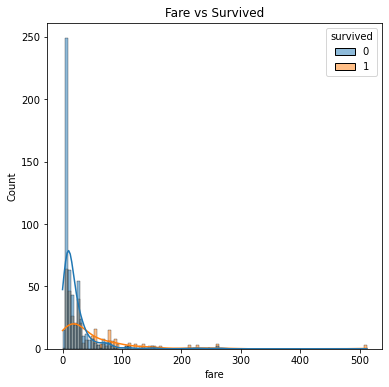

In [87]:
plt.figure(figsize = (6,6))
plt.title('Fare vs Survived')
sns.histplot(x=df['fare'],hue=df['survived'],kde=True)
plt.show()

## Multi-Variate Analysis vs Survived column

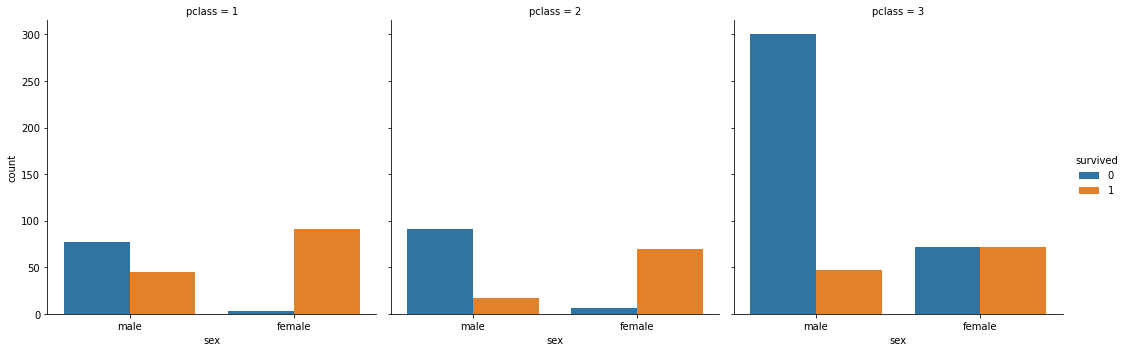

In [88]:
sns.catplot(x='sex', col='pclass', hue='survived',data =df,kind='count')

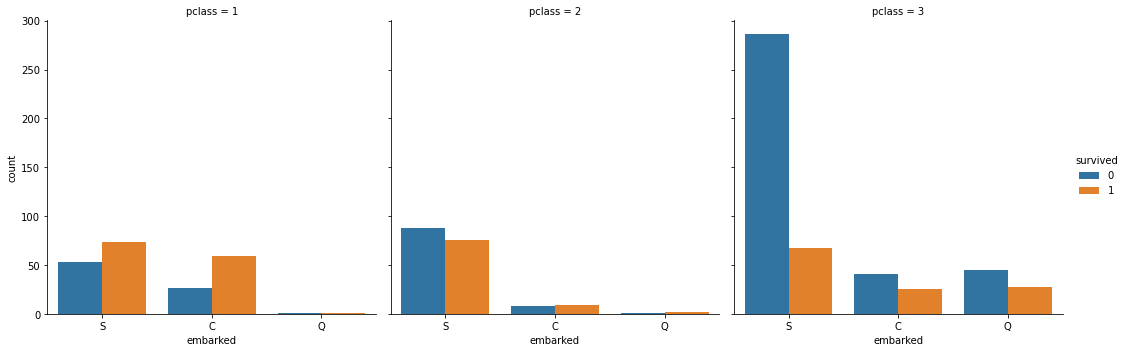

In [89]:
sns.catplot(x='embarked', col='pclass', hue='survived',data =df,kind='count')

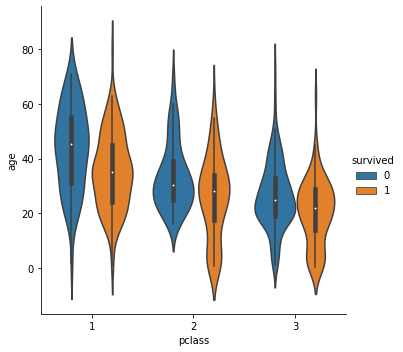

In [90]:
sns.catplot(x="pclass", y="age",hue="survived",data=df,kind="violin")

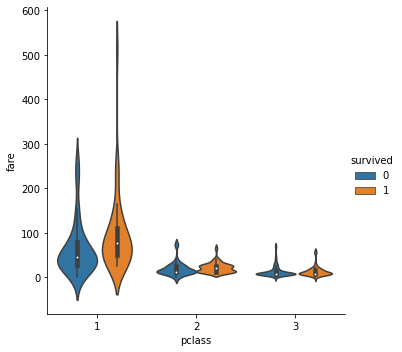

In [91]:
sns.catplot(x="pclass", y="fare",hue="survived",data=df,kind="violin")

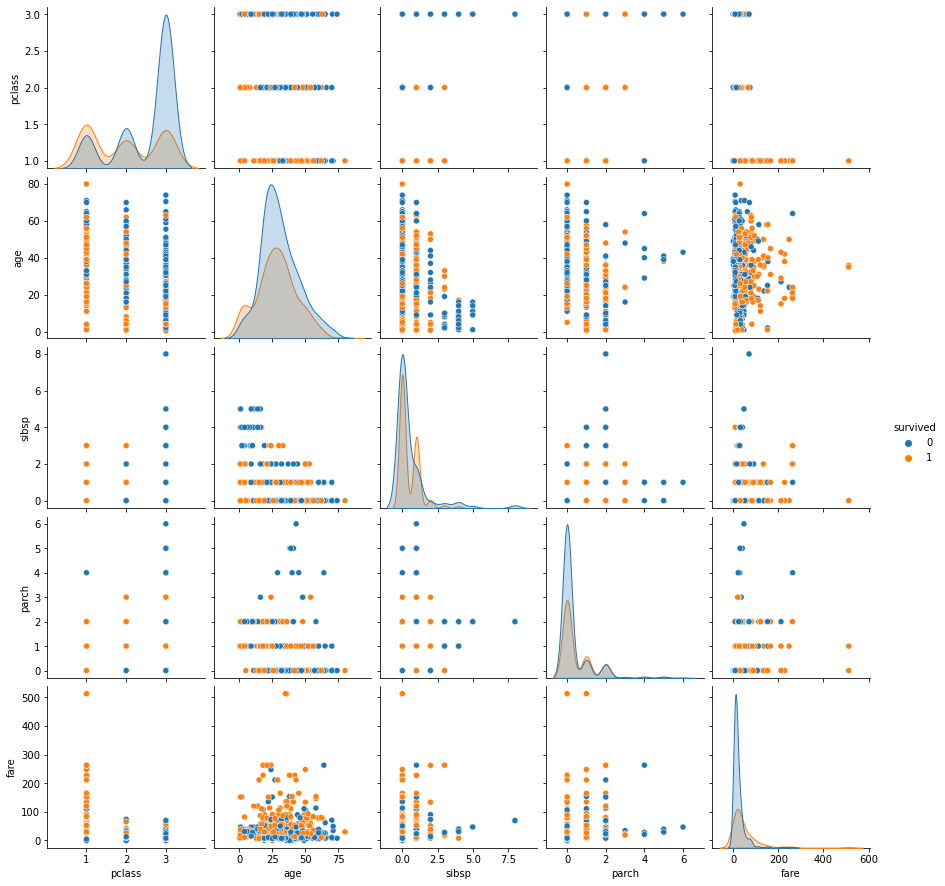

In [92]:
sns.pairplot(df, hue='survived')

## Data Cleansing & Feature Engineering

### Handling Missing values

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [94]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

### Age column

In [95]:
df['age'].mode()[0]

24.0

In [96]:
df['age'] =df['age'].fillna(df['age'].mode()[0])

### Embarked Column

In [97]:
df['embarked'].mode()[0]

'S'

In [98]:
df['embarked'] =df['embarked'].fillna(df['embarked'].mode()[0])

In [99]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [100]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Handling categorical data

Sex Column

In [101]:
df['sex'] = df['sex'].map({'male':0,'female':1})

In [102]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


Embarked column

In [103]:
df = pd.get_dummies(data =df,columns=['embarked'],drop_first =True)

### Creating a new column "Relatives" based on SibSp and Parch

In [104]:
df['relatives'] = df['sibsp']+df['parch']

In [105]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,relatives
560,0,3,0,24.0,0,0,7.7500,1,0,0
89,0,3,0,24.0,0,0,8.0500,0,1,0
49,0,3,1,18.0,1,0,17.8000,0,1,1
817,0,2,0,31.0,1,1,37.0042,0,0,2
439,0,2,0,31.0,0,0,10.5000,0,1,0
200,0,3,0,28.0,0,0,9.5000,0,1,0
503,0,3,1,37.0,0,0,9.5875,0,1,0
451,0,3,0,24.0,1,0,19.9667,0,1,1
136,1,1,1,19.0,0,2,26.2833,0,1,2
563,0,3,0,24.0,0,0,8.0500,0,1,0


### Checking correlation

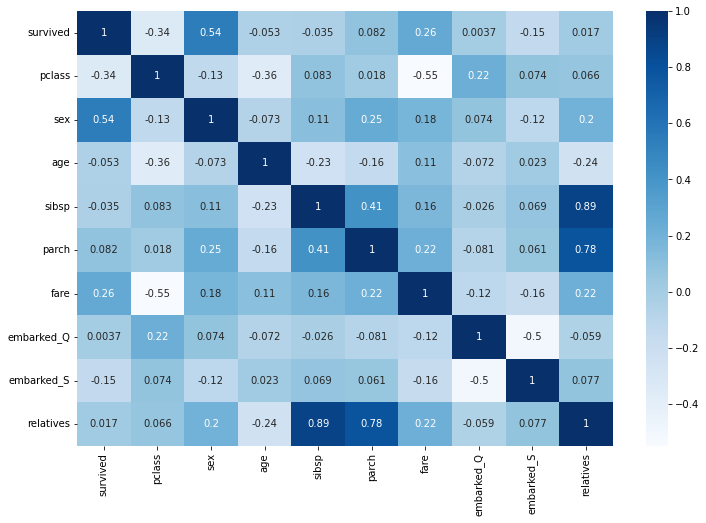

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap='Blues')
plt.show()

In [107]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,relatives
0,0,3,0,22.0,1,0,7.25,0,1,1


## Observations
#### The columns Passenger Id, Name, Ticket and Cabin have no impact on whether the person survived the disaster or not. So the columns can be dropped.
#### The columns Relative has been created using the SiblingSpouse(SibSp) and Parents(Parch). 
#### So those 2 columns also have been dropped

In [108]:
df = df.drop(columns=['sibsp','parch','embarked_Q','embarked_S'])

## Splitting the Data into X & y

In [109]:
X = df.drop(['survived'],axis=1)

In [110]:
X

,pclass,sex,age,fare,relatives
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,0
888,3,1,24.0,23.4500,3
889,1,0,26.0,30.0000,0


In [111]:
y=df['survived']

In [112]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

### Train_Test Split

In [114]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

### I have tested the following models for this project:

1. Logistic Regression
2. Random Forest
4. Decision Tree 
3. K-Nearest-Neighbor (KNN)

### Logistic Regression

In [116]:
logreg = LogisticRegression()

In [117]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [119]:
log_reg_pred = logreg.predict(X_test)

In [124]:
print("Accuracy:",accuracy_score(y_test,log_reg_pred))

Accuracy: 0.8044692737430168


### Random Forest

In [126]:
rfclf=RandomForestClassifier(n_estimators=100,max_depth=7)
rfclf.fit(X_train,y_train)
rf_pred=rfclf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, rf_pred))

Accuracy: 0.8156424581005587


### Decision Tree

In [127]:
dt = DecisionTreeClassifier()

In [128]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [131]:
dt_pred=dt.predict(X_test)

In [132]:
print("Accuracy:",accuracy_score(y_test,dt_pred))

Accuracy: 0.7653631284916201


### KNN

In [136]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('Accuracy: ', knn.score(X_test,y_test))

Accuracy:  0.6927374301675978


## GridSearchCV on Random Forest

In [138]:
params = {'max_depth': [2,3,4,5,6],'criterion' :['gini', 'entropy', 'log_loss'],'n_estimators': [50,100,200,300,400,500,600]}

rfcgscv = GridSearchCV(estimator = rfclf, cv=10,param_grid = params, n_jobs = -1, verbose = 2, return_train_score=True)

rfcgscv.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


C:\Users\bhanu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.80475352 0.80052817 0.79632238 0.80054773 0.80618153 0.79913928
 0.80618153 0.81177621 0.8131651  0.81177621 0.82020736 0.82022692
 0.81600156 0.81739045 0.82304382 0.82723005 0.83423318 0.8314554
 0.8314554  0.8314554  0.8286385  0.83284429 0.8314554  0.83429186
 0.83284429 0.83141628 0.83282473 0.83284429 0.82723005 0.82580203
 0.82724961 0.83002739 0.83000782 0.82861894 0.83002739 0.79913928
 0.80056729 0.80195618 0.80618153 0.80054773 0.80618153 0.80477308
 0.81455399 0.81036776 0.81457355 0.82580203 0.81874022 0.82161581
 0.81596244 0.81875978 0.82018779 0.83002739 0.83002739 0.83143584
 0.82723005 0.82441315 0.83284429 0.83004695 0.8286385  0.83705008
 0.83564163 0.83425274 0.83562207 0.82724961 0.83147496 0.83143584
 0.83421362 0.83425274 0.83141628 0.83143584        nan        nan
        nan        nan        nan        nan        na

GridSearchCV(cv=10, estimator=RandomForestClassifier(max_depth=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [139]:
as_rfcgscv = rfcgscv.score(X_test, y_test)
as_rfcgscv

0.8044692737430168

In [140]:
import pickle

In [144]:
pickle.dump(rfcgscv,open('RandForGSCV.pkl','wb'))